<a href="https://colab.research.google.com/github/Saloni1707/ImageCompression/blob/main/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [5]:
image_og = imread("/content/san.jpg") #!HighResolution image
print(image_og.shape)

(344, 612, 3)


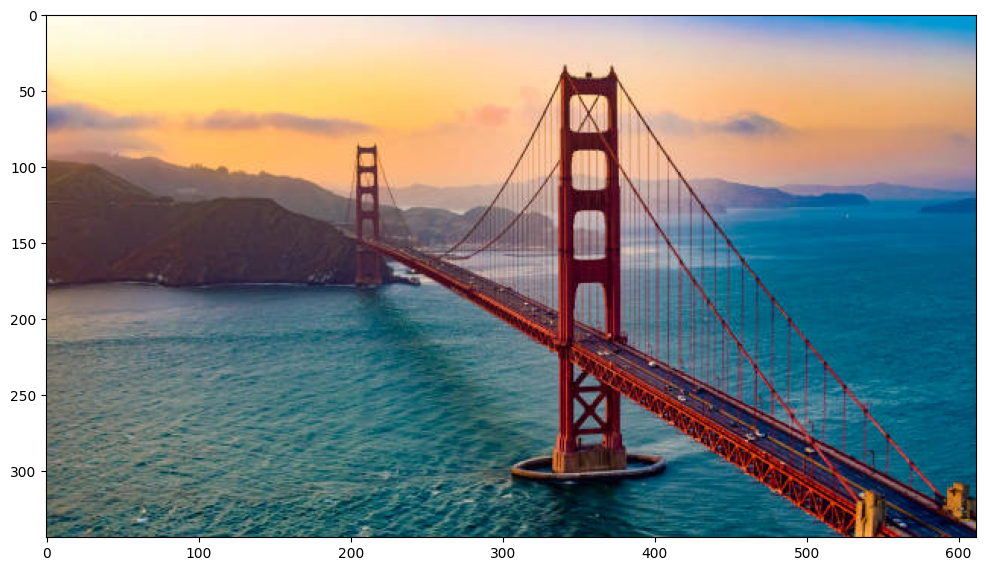

In [6]:
plt.figure(figsize=[12,8])
plt.imshow(image_og)

In [7]:
#converting the image to grayscale
image_bw=image_og.sum(axis=2)#converted from 3d to 2d -> RGB summed up
print(image_bw.shape)

(344, 612)


In [10]:
image_norm= image_bw/image_bw.max()
print(image_norm.max())#the pixel values normalised to [0,1] here

1.0


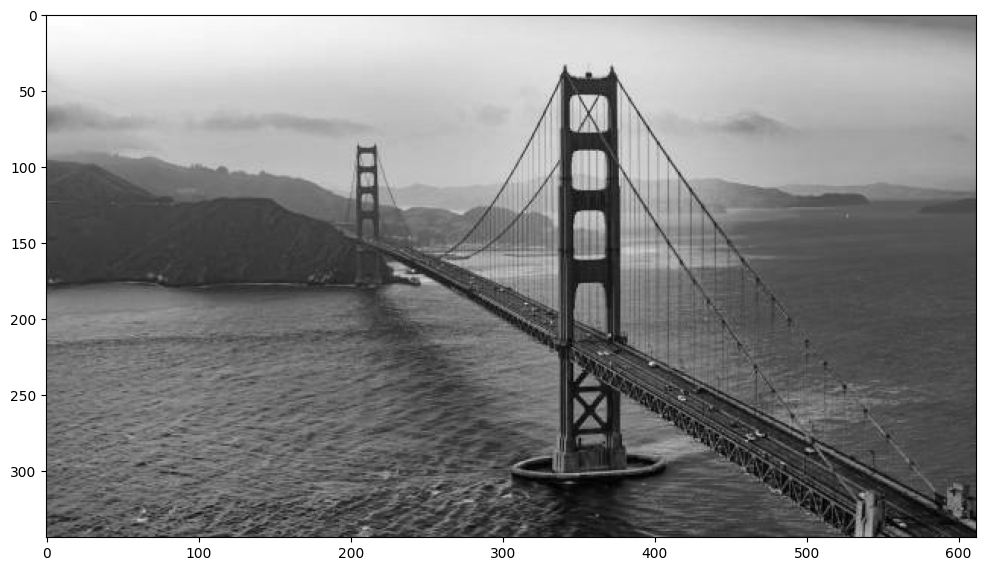

In [12]:
plt.figure(figsize=[12,8])
plt.imshow(image_norm,cmap=plt.cm.gray)

In [13]:
#PCA apply -> so high dimension to low dimension
from sklearn.decomposition import PCA,IncrementalPCA
pca=PCA() #next up write PCA from scratch
pca.fit(image_norm)

PCA()

In [14]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

In [16]:
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+str(k)) #so here 19components capture the 95% of image detail

Number of components explaining 95% variance: 19


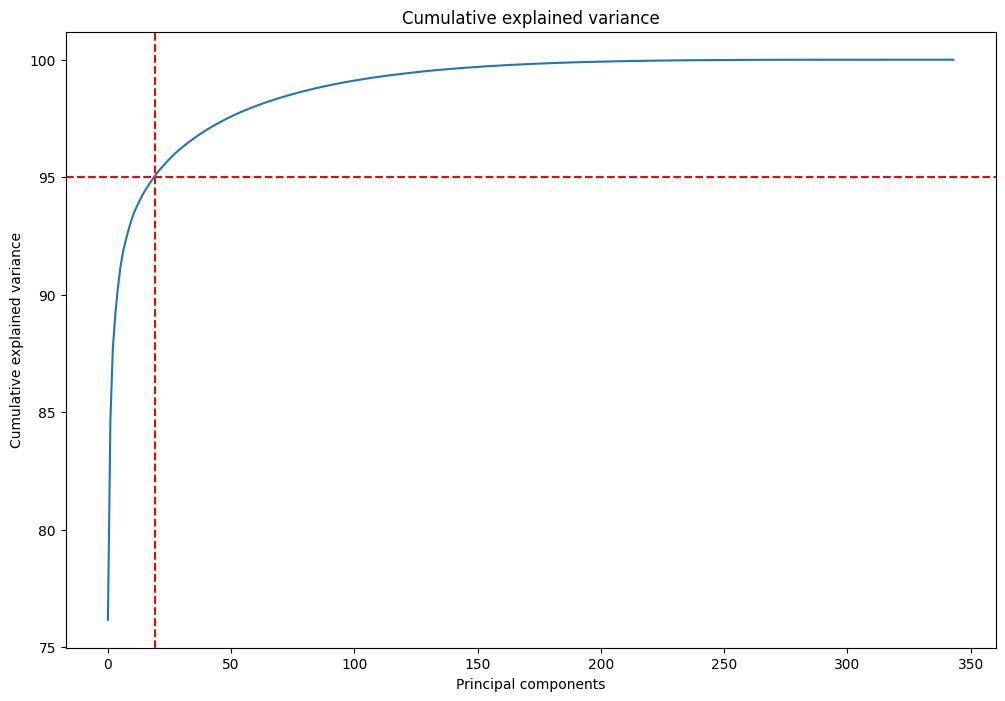

In [17]:
plt.figure(figsize=[12,8])
plt.title('Cumulative explained variance')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='r',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')
ax=plt.plot(var_cumu)

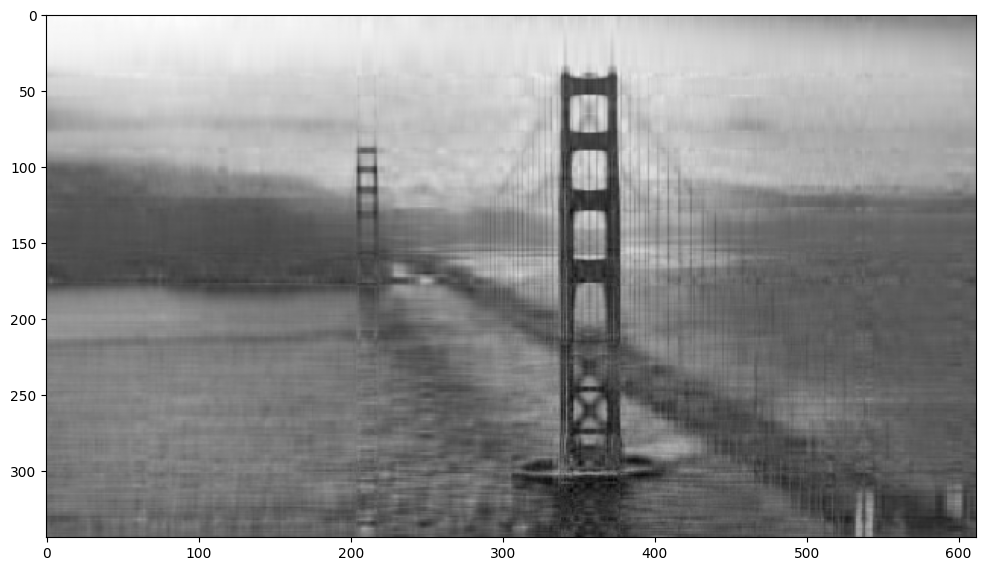

In [20]:
#will reconstruct the bw image using the 19 components that explain 95% of variance in image

ipca=IncrementalPCA(n_components=k)
image_new=ipca.inverse_transform(ipca.fit_transform(image_norm))
#plotting this new reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_new,cmap=plt.cm.gray)
#so here the image has been compressed(this reminds me of 90s image)